#### Imports

In [1]:
# Imports for data analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Imports for text processing
import string
import nltk
from tqdm import tqdm

In [3]:
# Specific nltk imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/thesis-
[nltk_data]     server1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/thesis-
[nltk_data]     server1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Imports for system IO
from pathlib import Path

### Reading in the STS data set

In [5]:
# Taken from readme.txt downloaded with the STS-b benchmark data set

col_names = [
    "genre",
    "filename",
    "year",
    "id_from_source",
    "score",
    "sentence1",
    "sentence2",
    "extra1",
    "extra2"
]

In [6]:
sts_dataset = pd.read_csv('data/input/sts-train.csv', sep="\t", names=col_names)

## Exploratory analysis

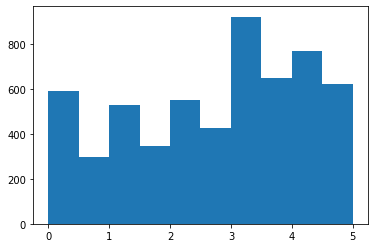

In [7]:
plt.figure()

plt.hist(sts_dataset.iloc[:]["score"], bins=10)

plt.show()

In [8]:
sts_dataset.iloc[:10][:]

,genre,filename,year,id_from_source,score,sentence1,sentence2,extra1,extra2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.,NaN,NaN
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.,NaN,NaN
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,NaN,NaN
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.,NaN,NaN
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.,NaN,NaN
5,main-captions,MSRvid,2012test,11,4.25,Some men are fighting.,Two men are fighting.,NaN,NaN
6,main-captions,MSRvid,2012test,12,0.50,A man is smoking.,A man is skating.,NaN,NaN
7,main-captions,MSRvid,2012test,13,1.60,The man is playing the piano.,The man is playing the guitar.,NaN,NaN
8,main-captions,MSRvid,2012test,14,2.20,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,NaN,NaN
9,main-captions,MSRvid,2012test,16,5.00,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,NaN,NaN


## Functions

In [9]:
# Function to tokenize a list of sentences
# Input - list of strings
# Output - list of array of words (tokens)
def tokenize_list(sentence_list):
    
    # Loop all the sentences in the list
    for i in tqdm(range(len(sentence_list))):
        current_sentence = str(sentence_list[i]).lower()
        sentence_list[i] = word_tokenize(current_sentence)
        
    return sentence_list

In [10]:
# Function for removing punctuation as well as german and english stopwords
# Input - list of tokenized sentences
# Output - list of tokenized sentences with desired words removed
def filter_sentences(token_sentence_list):
    
    # Remove 'man' from the german stopwords
    german_stopwords = stopwords.words("german")
    german_stopwords.remove('man')
    
    for i in tqdm(range(len(token_sentence_list))):
        sentence = token_sentence_list[i]

        filter_sentence = []

        for word in sentence:
            if not word in string.punctuation:
                if not (word in stopwords.words("english") or word in german_stopwords):
                    filter_sentence.append(word)

        token_sentence_list[i] = filter_sentence
    
    return token_sentence_list

In [11]:
# Function for writing the responses to a txt file
# Input - filename, list of the text to be saved
# Output - txt file with filename to ./data folder
def write_to_txt(filename, text_list):
    
    #Check whether output directory exists
    Path('./data/output').mkdir(parents=True, exist_ok=True)
    
    with open(f'data/output/{filename}.txt', 'w') as f:
        for sentence in text_list:
            # Check for empty sentences
            if not sentence == []:
                f.write("%s\n" % sentence)

In [12]:
# Function to filter sentences to word2vec format
def data_to_word2vec_format(list_of_sentences):
    
    #Tokenize the data
    list_of_sentences = tokenize_list(list_of_sentences)
    
    #Filter the tokenized data
    list_of_sentences = filter_sentences(list_of_sentences)
    
    return list_of_sentences
    

## Processing STS for training stage

### Word2vec

In [13]:
sts_text = sts_dataset[["sentence1","sentence2"]]

In [14]:
sts_text

,sentence1,sentence2
0,A plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.
...,...,...
5706,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [15]:
# Create a list of all sentences, condensed to one column
word2vec_input = sts_text.values.flatten()

In [16]:
word2vec_input

array(['A plane is taking off.', 'An air plane is taking off.',
       'A man is playing a large flute.', ...,
       'China Scrambles to Reassure Jittery Stock Traders',
       'Putin spokesman: Doping charges appear unfounded',
       'The Latest on Severe Weather: 1 Dead in Texas After Tornado'],
      dtype=object)

In [17]:
tokenize_list(word2vec_input)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:00<00:00, 14874.72it/s]


array([list(['a', 'plane', 'is', 'taking', 'off', '.']),
       list(['an', 'air', 'plane', 'is', 'taking', 'off', '.']),
       list(['a', 'man', 'is', 'playing', 'a', 'large', 'flute', '.']),
       ...,
       list(['china', 'scrambles', 'to', 'reassure', 'jittery', 'stock', 'traders']),
       list(['putin', 'spokesman', ':', 'doping', 'charges', 'appear', 'unfounded']),
       list(['the', 'latest', 'on', 'severe', 'weather', ':', '1', 'dead', 'in', 'texas', 'after', 'tornado'])],
      dtype=object)

In [18]:
filter_sentences(word2vec_input)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:06<00:00, 1674.95it/s]


array([list(['plane', 'taking']), list(['air', 'plane', 'taking']),
       list(['man', 'playing', 'large', 'flute']), ...,
       list(['china', 'scrambles', 'reassure', 'jittery', 'stock', 'traders']),
       list(['putin', 'spokesman', 'doping', 'charges', 'appear', 'unfounded']),
       list(['latest', 'severe', 'weather', '1', 'dead', 'texas', 'tornado'])],
      dtype=object)

In [19]:
write_to_txt('sts_word2vec_input', word2vec_input)

In [20]:
# Remove from memory
del word2vec_input

### SimCSE

In [21]:
simcse_input = sts_text.values.flatten()

In [22]:
write_to_txt('sts_simcse_input', simcse_input)

In [23]:
# Remove from memory
del simcse_input

## Processing STS for clustering stage

### SimCSE

In [24]:
sts_test_dataset = pd.read_csv('data/input/sts-test.csv', sep="\t", names=col_names)

In [25]:
clustering_columns = ['score','sentence1','sentence2']
cluster_data = sts_test_dataset[clustering_columns] 

In [26]:
cluster_data.to_csv('data/output/sts_simcse_test_input.csv')

### Word2vec

In [27]:
data_to_word2vec_format(cluster_data['sentence1'].values)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1379/1379 [00:00<00:00, 1697.74it/s]


array([list(['girl', 'styling', 'hair']),
       list(['group', 'men', 'play', 'soccer', 'beach']),
       list(['one', 'woman', 'measuring', 'another', 'woman', "'s", 'ankle']),
       ..., list(['much', 'know', 'secret', 'service']),
       list(['obama', 'struggles', 'soothe', 'saudi', 'fears', 'iran', 'talks', 'resume']),
       list(['south', 'korea', 'declares', 'end', 'mers', 'outbreak'])],
      dtype=object)

In [28]:
data_to_word2vec_format(cluster_data['sentence2'].values)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1379/1379 [00:00<00:00, 1726.91it/s]


array([list(['girl', 'brushing', 'hair']),
       list(['group', 'boys', 'playing', 'soccer', 'beach']),
       list(['woman', 'measures', 'another', 'woman', "'s", 'ankle']),
       ...,
       list(['lawmakers', 'sides', 'express', 'outrage', 'secret', 'service']),
       list(['myanmar', 'struggles', 'finalize', 'voter', 'lists', 'sunday', 'polls']),
       list(['north', 'korea', 'delegation', 'meets', 'south', 'korean', 'officials'])],
      dtype=object)

In [29]:
cluster_data.to_csv('data/output/sts_word2vec_test_input.csv')